# Project Title
## Computational social media- Project
### Saeed Rad, Evgeniy Chervonenko, Valentine Santarelli

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from functools import reduce
import operator 
import matplotlib.pyplot as plt
%matplotlib inline


# Exploring dataset
50 k tweets geolocalised in Lausanne

## Overview

In [3]:
# load json twitter data
data= pd.read_json('../data/lausanne_50K.json',typ='frame',lines=True)
data.head()

,_id,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,source,text,timestamp_ms,truncated,user
0,{'$oid': '55b932fd0a1776527f627ec2'},NaN,None,2015-07-29 20:09:32,NaN,"{'urls': [], 'trends': [], 'user_mentions': []...",NaN,NaN,0,False,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Flemme de me préparer,2015-07-29 20:09:32.554,False,"{'notifications': None, 'protected': False, 'd..."
1,{'$oid': '55b9720c0a1776527f628c28'},NaN,None,2015-07-30 00:38:35,NaN,"{'urls': [], 'trends': [], 'user_mentions': []...",NaN,NaN,0,False,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Trop hâte d'aller à Zurich,2015-07-30 00:38:35.304,False,"{'notifications': None, 'id_str': '569876210',..."
2,{'$oid': '55b9730c0a1776527f628c3b'},NaN,None,2015-07-30 00:42:51,NaN,"{'urls': [], 'trends': [], 'user_mentions': []...",NaN,NaN,0,False,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",mais accidentellement il ajouta a cette mixtur...,2015-07-30 00:42:51.603,False,"{'notifications': None, 'id_str': '569876210',..."
3,{'$oid': '55bbca590a1776527f62dacc'},NaN,None,2015-07-31 19:19:53,NaN,"{'urls': [], 'trends': [], 'user_mentions': [{...",NaN,NaN,0,False,...,NaN,NaN,NaN,0,False,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",@sansplomb99 lui a payé en effet 😁,2015-07-31 19:19:53.202,False,"{'notifications': None, 'id_str': '716221184',..."
4,{'$oid': '55bc9c8e0a1776527f62ee4a'},NaN,None,2015-08-01 10:16:45,NaN,{'urls': [{'expanded_url': 'https://twitter.co...,NaN,NaN,0,False,...,"{'place': None, 'truncated': False, 'created_a...",{'$numberLong': '627406966093164544'},6.274070e+17,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Holaaa Argentinaa!! Ya terminó la clase y estu...,2015-08-01 10:16:45.789,False,"{'notifications': None, 'protected': False, 'd..."


### User's info

In [4]:
data['user'][0]

{'contributors_enabled': False,
 'created_at': 'Mon May 21 17:37:48 +0000 2012',
 'default_profile': True,
 'default_profile_image': False,
 'description': 'Insta: melo_km',
 'favourites_count': 380,
 'follow_request_sent': None,
 'followers_count': 163,
 'following': None,
 'friends_count': 65,
 'geo_enabled': True,
 'id': 586804968,
 'id_str': '586804968',
 'is_translator': False,
 'lang': 'fr',
 'listed_count': 1,
 'location': 'Brooklyn, NYC',
 'name': 'km',
 'notifications': None,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': False,
 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/586804968/1436931020',
 'profile_image_url': 'http://pbs.twimg.com/profile_images/622993756371963905/qr67mz-D_normal.jpg',
 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/62299375

### Cleaning and Extracting useful variable from dict

In [5]:

data['created_at']= pd.to_datetime(data['created_at'])
data['tweet_id']=data['_id'].map(lambda x: x['$oid'])
data['hashtags']=data['entities'].map(lambda x: x['hashtags'])
data['hashtags']= data['hashtags'].map(lambda x: [xi['text'].lower() for xi in x] if x != [] else np.nan)
data['user_id']=data['user'].map(lambda x: x['id'])
data['user_id']=data['user_id'].map(lambda x: x['$numberLong'] if isinstance(x,dict) else x)
data['user_lang']=data['user'].map(lambda x: x['lang'])
data['user_location']=data['user'].map(lambda x: x['location'])


## Basic statistics

In [6]:
data.describe() #doesn't give anything

,contributors,favorite_count,id_str,in_reply_to_status_id_str,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,quoted_status_id_str,retweet_count
count,0.0,50000.0,5.000000e+04,1.634000e+04,1.927100e+04,49958.000000,20941.000000,3.810000e+03,50000.0
mean,NaN,0.0,7.649092e+17,7.656941e+17,4.957148e+16,0.076364,0.009598,7.596949e+17,0.0
std,NaN,0.0,2.930100e+16,3.429869e+16,1.852219e+17,0.265583,0.097502,3.529139e+16,0.0
min,NaN,0.0,6.264847e+17,2.401283e+10,8.412000e+03,0.000000,0.000000,3.194941e+17,0.0
25%,NaN,0.0,7.374537e+17,7.375975e+17,1.547980e+08,0.000000,0.000000,7.367500e+17,0.0
50%,NaN,0.0,7.673406e+17,7.715668e+17,5.573253e+08,0.000000,0.000000,7.576861e+17,0.0
75%,NaN,0.0,7.888412e+17,7.921157e+17,2.483374e+09,0.000000,0.000000,7.847596e+17,0.0
max,NaN,0.0,8.145965e+17,8.145963e+17,8.135226e+17,1.000000,1.000000,8.145638e+17,0.0


## Temporal statistics

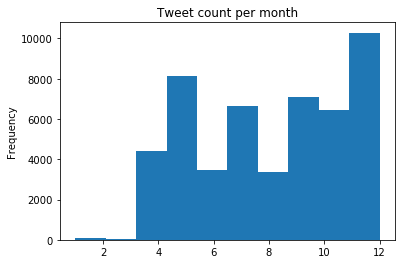

In [30]:
up_time= pd.DataFrame(columns=['year', 'month','date'])
up_time['date']=data['created_at']

up_months = pd.to_datetime(data['created_at'],format='%y-%M-%d %H:%M %p').apply(lambda x: x.month)
up_time['month']=up_months

up_year = pd.to_datetime(data['created_at'],format='%y-%M-%d %H:%M %p').apply(lambda x: x.year)
up_time['year']=up_year

up_months.plot(kind='hist', title='Tweet count per month')

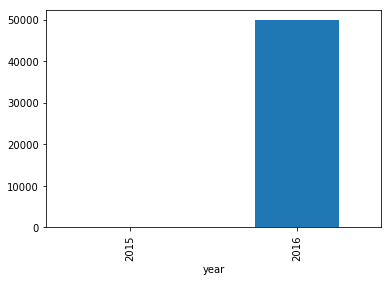

In [31]:
up_time.groupby('year')['date'].count().plot(kind='bar',title='Tweet count per month')

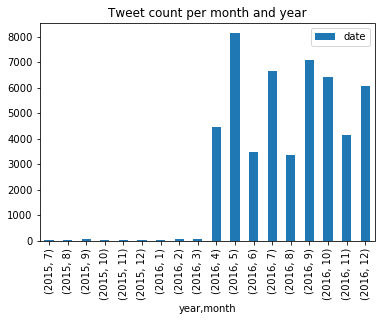

In [32]:
up_time.groupby(['year','month']).count().plot(kind='bar',title='Tweet count per month and year')

## Number of characters

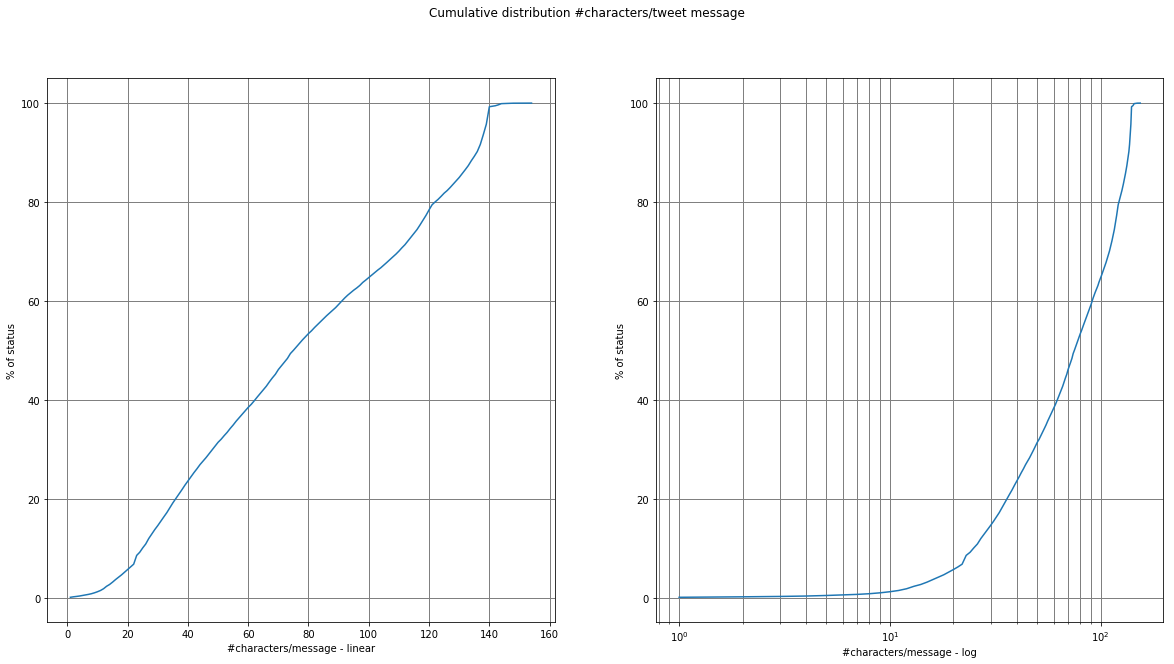

In [33]:
nb_characters = pd.DataFrame(data['text'].apply(lambda x : len(x)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.suptitle('Cumulative distribution #characters/tweet message')

ax1.plot(nb_characters.sort_values(by='text').reset_index().groupby('text').count().cumsum()*100/nb_characters.size)
ax1.set_xlabel('#characters/message - linear')
ax1.set_ylabel('% of status')
ax1.grid(color='grey', linestyle='-', linewidth=1, axis='both', which='both')

ax2.plot(nb_characters.sort_values(by='text').reset_index().groupby('text').count().cumsum()*100/nb_characters.size)
ax2.set_xscale('log')
ax2.set_xlabel('#characters/message - log')
ax2.set_ylabel('% of status')
ax2.grid(color='grey', linestyle='-', linewidth=1, axis='both', which='both')

## Number of users

In [35]:
print('number of users in the dataset: {}'.format(data['user_id'].unique().shape[0]))

number of users in the dataset: 4462


## Tweet frequency per user

In [36]:
tweet_freq= data.groupby(by='user_id').count()
tweet_freq=tweet_freq['_id']
tweet_freq=tweet_freq.reset_index().rename(columns={'_id': 'tweet count'})
#tweet_freq.sort_values(by='tweet count')

(4462, 2)


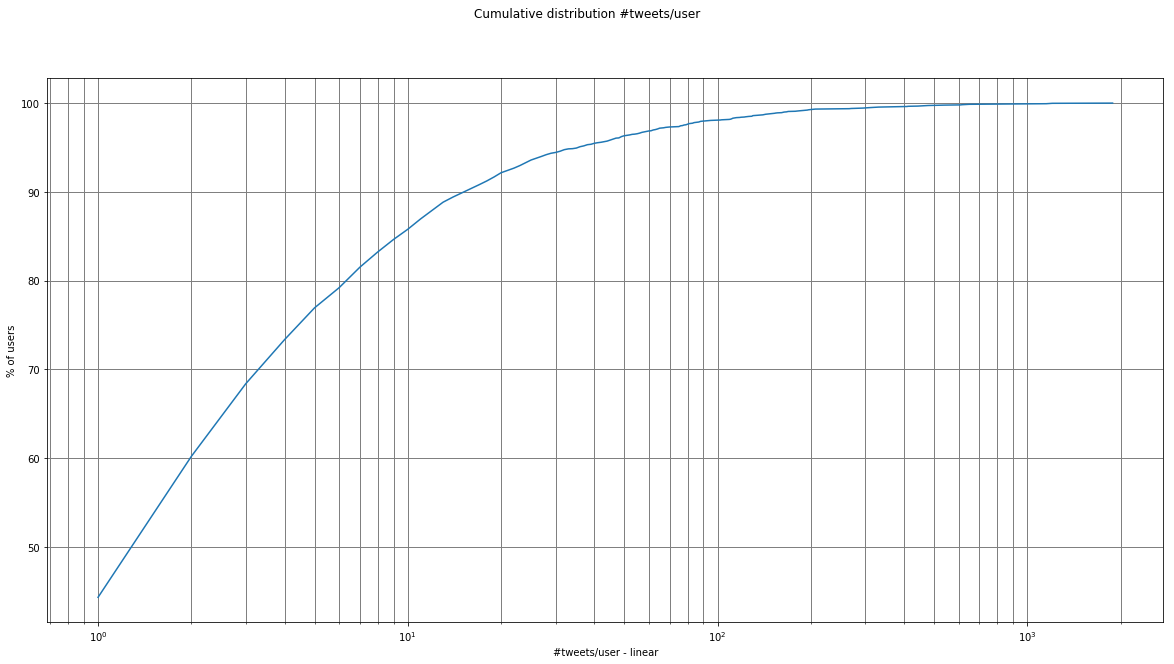

In [37]:
f, ax1 = plt.subplots(1, 1, figsize=(20,10))
f.suptitle('Cumulative distribution #tweets/user')

ax1.plot(pd.DataFrame(tweet_freq.sort_values(by='tweet count')).groupby('tweet count').count().cumsum()*100/tweet_freq.shape[0])
ax1.set_xlabel('#tweets/user - linear')
ax1.set_ylabel('% of users')
ax1.set_xscale('log')
ax1.grid(color='grey', linestyle='-', linewidth=1, axis='both', which='both')

# Finding groundtruth for local and unlocal users

### Hashtag frequently used by users with 1 tweets

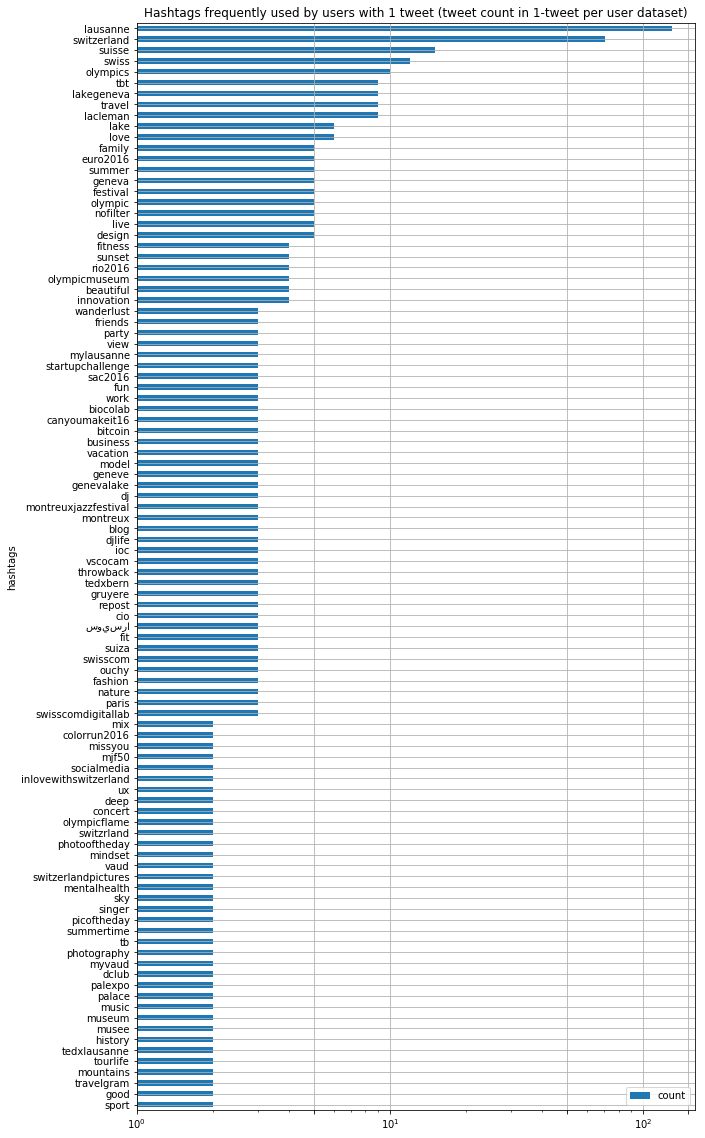

In [55]:
#recover user id with one tweet

users_1_tweet=tweet_freq[tweet_freq['tweet count']==1]['user_id']
data_1_tweet=data[[ x in list(users_1_tweet) for x in data['user_id']]]


def ComputeFrequentdHashtags(data):  
    #exclude tweet without hashtags
    nan_hashtags=data[~data['hashtags'].isnull()]
    associated_hashtags= list(nan_hashtags['hashtags'])
    associated_hashtags= reduce(operator.add, associated_hashtags)
    associated_hashtags= [x for x in associated_hashtags ]
    associated_hashtags= pd.concat([pd.DataFrame(associated_hashtags)])
    associated_hashtags['count']= pd.DataFrame(list(np.ones(len(associated_hashtags))))
    associated_hashtags = associated_hashtags.rename(columns={0:'hashtags'})
    associated_hashtags = associated_hashtags.groupby(by='hashtags').count().sort_values(by= 'count', ascending= True).tail(100)
    return associated_hashtags.iloc[::-1]

frequent_hashtag_1=ComputeFrequentdHashtags(data_1_tweet)
#frequent_hashtag_1=frequent_hashtag_1.reset_index()
frequent_hashtag_1[frequent_hashtag_1['count']>1].iloc[::-1].plot(kind='barh', figsize=(10,20), logx=True, grid=True, xticks=[1,5,10,50,100,150], title='Hashtags frequently used by users with 1 tweet (tweet count in 1-tweet per user dataset)')

### Hashtag frequently used by users with more tweets

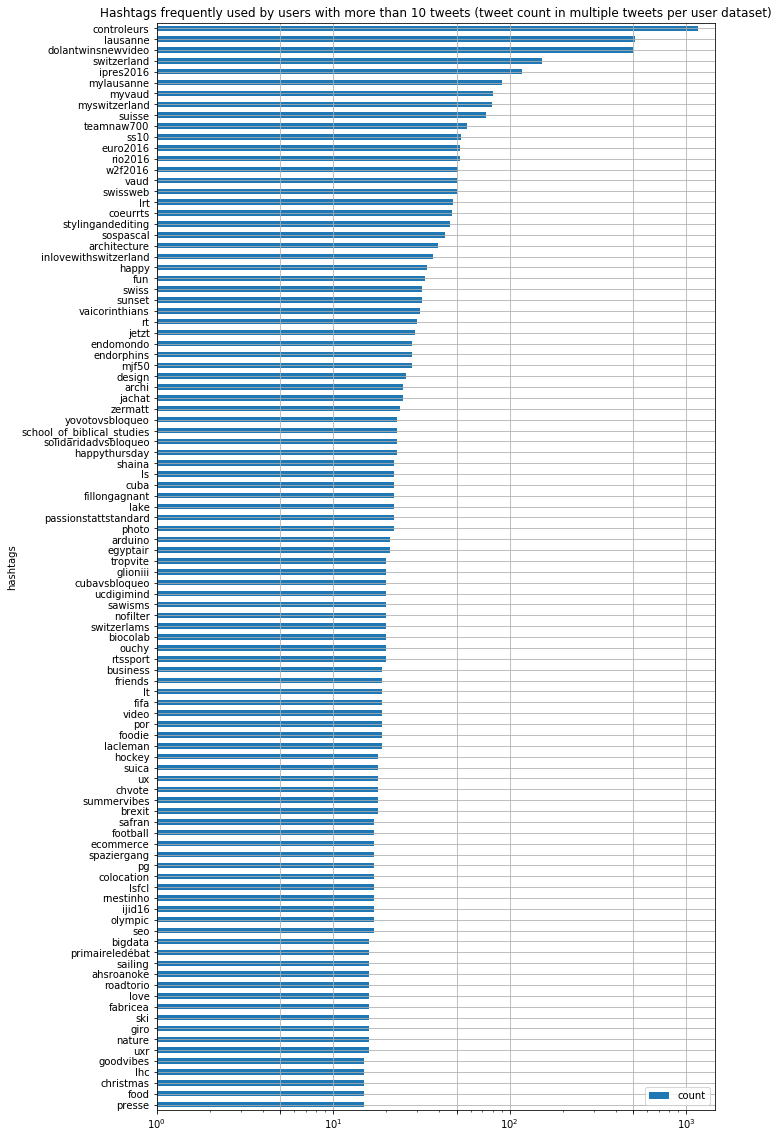

In [56]:
#recover user id with one tweet

users_multiple_tweet=tweet_freq[tweet_freq['tweet count'] > 10]['user_id']
data_multiple_tweet=data[[ x in list(users_multiple_tweet) for x in data['user_id']]]


def ComputeFrequentdHashtags(data):  
    #exclude tweet without hashtags
    nan_hashtags=data[~data['hashtags'].isnull()]
    associated_hashtags= list(nan_hashtags['hashtags'])
    associated_hashtags= reduce(operator.add, associated_hashtags)
    associated_hashtags= [x for x in associated_hashtags ]
    associated_hashtags= pd.concat([pd.DataFrame(associated_hashtags)])
    associated_hashtags['count']= pd.DataFrame(list(np.ones(len(associated_hashtags))))
    associated_hashtags = associated_hashtags.rename(columns={0:'hashtags'})
    associated_hashtags = associated_hashtags.groupby(by='hashtags').count().sort_values(by= 'count', ascending= True).tail(100)
    return associated_hashtags.iloc[::-1]

frequent_hashtag_multiple=ComputeFrequentdHashtags(data_multiple_tweet)
#frequent_hashtag_multiple=frequent_hashtag_multiple.reset_index()
frequent_hashtag_multiple[frequent_hashtag_multiple['count']>1].iloc[::-1].plot(kind='barh', figsize=(10,20), logx=True, grid=True, xticks=[1,5,10,50,100,500,1000],title='Hashtags frequently used by users with more than 10 tweets (tweet count in multiple tweets per user dataset)')

### Common hashtags for tweets of users with only one tweet / more than 10 tweets

In [41]:
# hashtag in the interesection 
def intersect(a, b):
    return list(set(a) & set(b))
intersect_ind=intersect(frequent_hashtag_1.index.values, frequent_hashtag_multiple.index.values)
print('Hashtags frequently used by both users with 1 tweet or more than 10 tweets (not relevant hashtags)')
intersect_ind

Hashtags frequently used by both users with 1 tweet or more than 10 tweets (not relevant hashtags)


['switzerland',
 'lake',
 'vaud',
 'friends',
 'fun',
 'suisse',
 'sunset',
 'olympic',
 'ux',
 'lausanne',
 'nofilter',
 'euro2016',
 'swiss',
 'mjf50',
 'biocolab',
 'rio2016',
 'ouchy',
 'design',
 'business',
 'love',
 'mylausanne',
 'myvaud',
 'lacleman',
 'inlovewithswitzerland',
 'nature']

### Specific hashtags for tweets of users with more than 10 tweets

Try to find interesting hashtags that could serve as feature for local users. Example: #controleurs seems nice ;).

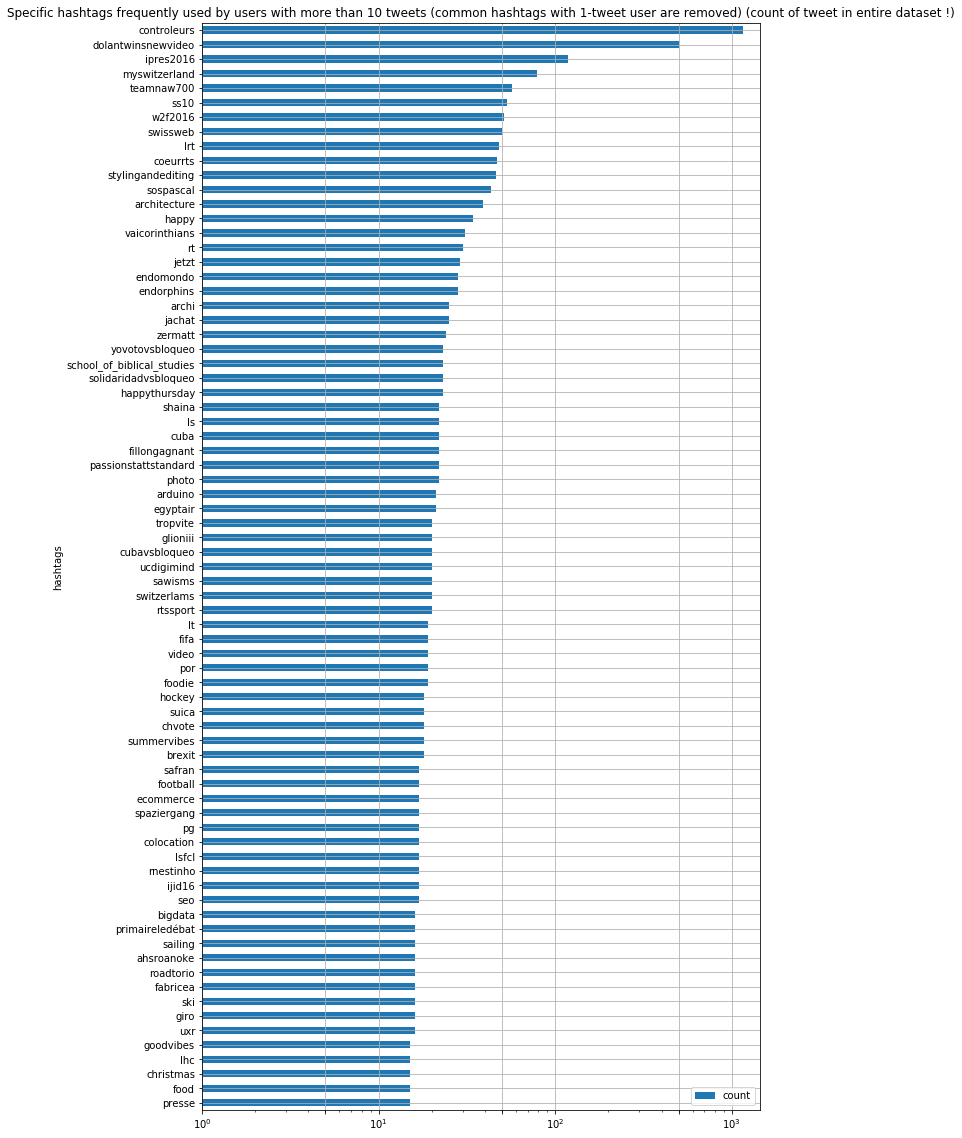

In [43]:
specific_to_multiple=frequent_hashtag_multiple[[x not in intersect_ind for x in frequent_hashtag_multiple.index.values]]
specific_to_multiple[specific_to_multiple['count']>1].iloc[::-1].plot(kind='barh', figsize=(10,20),logx=True, grid=True, xticks=[1,5,10,50,100,500,1000],title='Specific hashtags frequently used by users with more than 10 tweets (common hashtags with 1-tweet user are removed) (tweet count in multiple tweets per user dataset)')

### Specific hashtags for tweets of users with 1 tweet

Try to find interesting hashtags that could serve as feature for unlocal users. Example: #olympics could refers to the Olympic museum of Lausanne that is a must-seen for tourists.

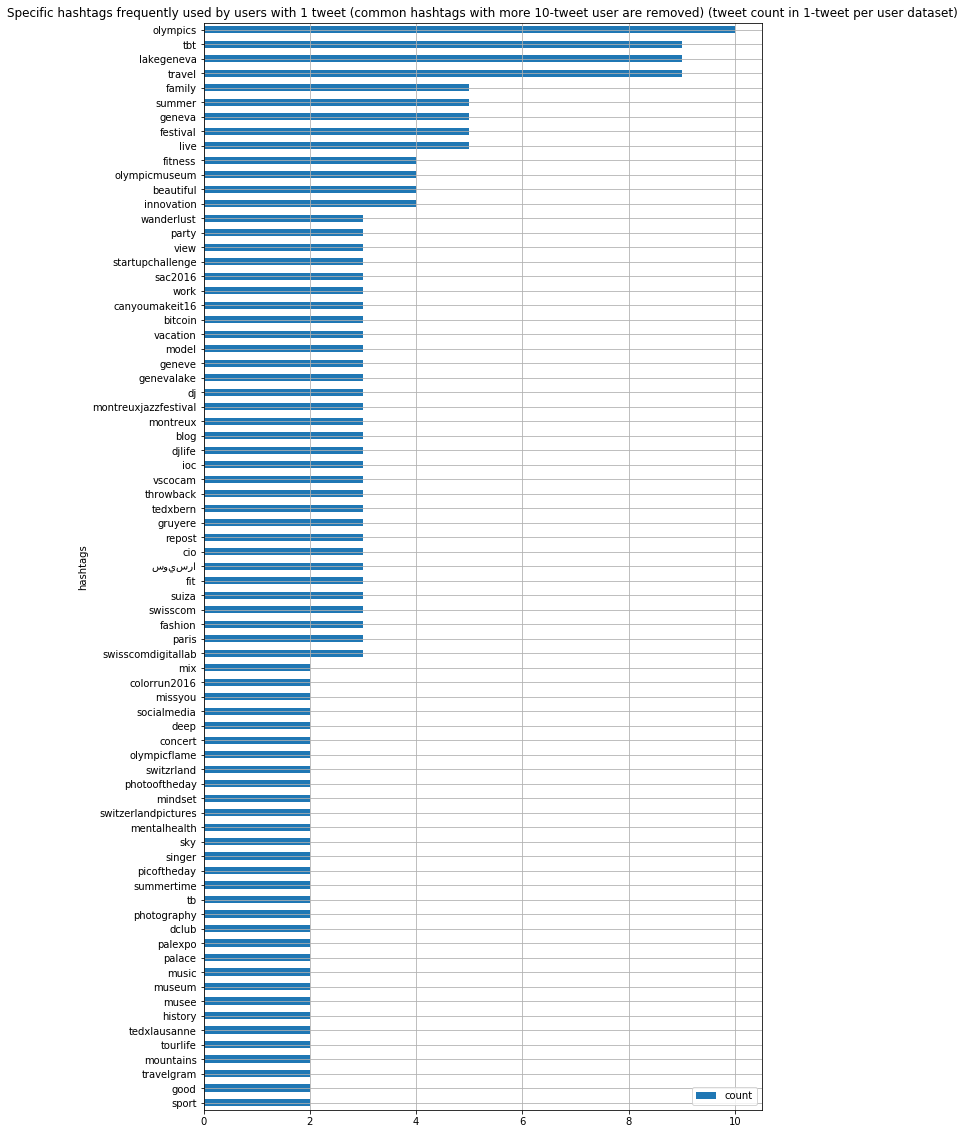

In [57]:
specific_to_1=frequent_hashtag_1[[x not in intersect_ind for x in frequent_hashtag_1.index.values]]
specific_to_1[specific_to_1['count']>1].iloc[::-1].plot(kind='barh', figsize=(10,20), grid=True, title='Specific hashtags frequently used by users with 1 tweet (common hashtags with more 10-tweet user are removed) (tweet count in 1-tweet per user dataset)')

## Features for unlocal: Find hashtags related to people visiting Lausanne

To establish a groundtruth of unlocal visitors, let's try to define a set of hashtags that could indicitate the user are currently visiting Lausanne.

In [46]:
#exclude tweet without hashtags
nan_hashtags=data[~data['hashtags'].isnull()]

### \#visiting

number of tweets with #visiting: 1


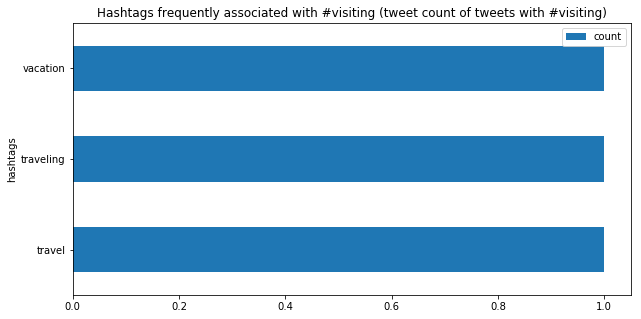

In [78]:
visiting_hashtags=nan_hashtags[ ['visiting' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #visiting: {}'.format(visiting_hashtags.shape[0]))
associated_visiting= ComputeAssociatedHashtags(data, 'visiting')
associated_visiting.iloc[::-1].plot(kind='barh', figsize=(10,5),title='Hashtags frequently associated with #visiting (tweet count of tweets with #visiting)')

### \#visit

number of tweets with #visit: 2


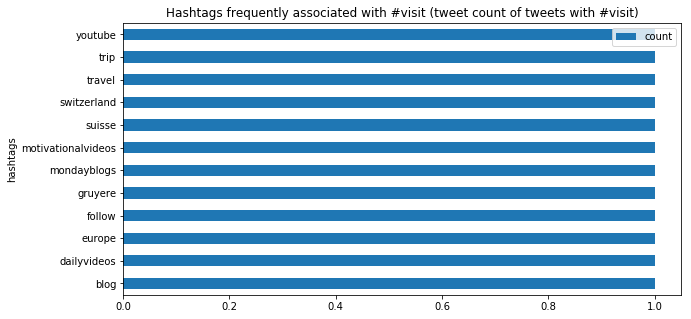

In [79]:
visit_hashtags=nan_hashtags[ ['visit' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #visit: {}'.format(visit_hashtags.shape[0]))
associated_visit= ComputeAssociatedHashtags(data, 'visit')
associated_visit.iloc[::-1].plot(kind='barh', figsize=(10,5),title='Hashtags frequently associated with #visit (tweet count of tweets with #visit)')

### \#tourism

number of tweets with #tourism: 3


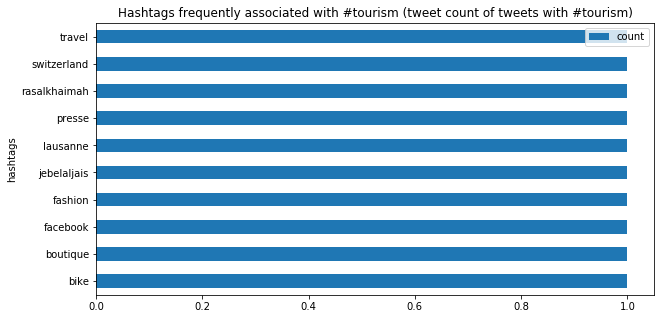

In [80]:
tourism_hashtags=nan_hashtags[ ['tourism' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #tourism: {}'.format(tourism_hashtags.shape[0]))
associated_tourism= ComputeAssociatedHashtags(data, 'tourism')
associated_tourism.iloc[::-1].plot(kind='barh', figsize=(10,5),title='Hashtags frequently associated with #tourism (tweet count of tweets with #tourism)')

### \#vacances (not sure we can use it, not a good feature for unlocal)

number of tweets with #vacances: 7


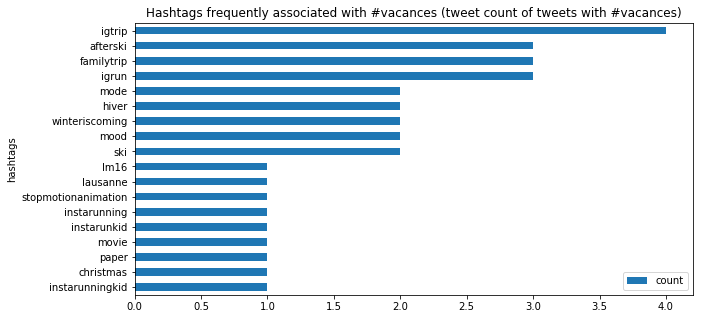

In [81]:
vacances_hashtags=nan_hashtags[ ['vacances' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #vacances: {}'.format(vacances_hashtags.shape[0]))
associated_vacances= ComputeAssociatedHashtags(data, 'vacances')
associated_vacances.iloc[::-1].plot(kind='barh', figsize=(10,5),title='Hashtags frequently associated with #vacances (tweet count of tweets with #vacances)')

### \#vacation (not sure we can use it, not a good feature for unlocal)

(4, 38)
number of tweets with #vacation: 4


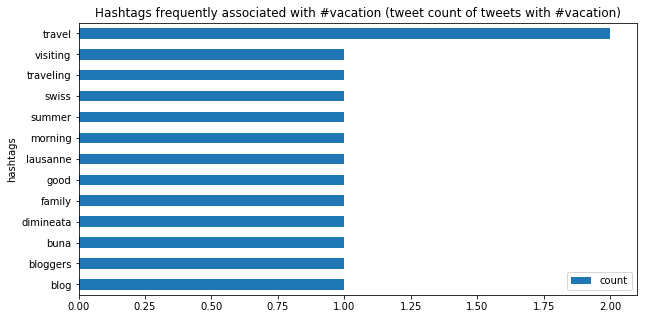

In [82]:
vacation_hashtags=nan_hashtags[ ['vacation' in x for x in list(nan_hashtags['hashtags'])] ]
print(vacation_hashtags.shape)
print('number of tweets with #vacation: {}'.format(vacation_hashtags.shape[0]))
associated_vacation= ComputeAssociatedHashtags(data, 'vacation')
associated_vacation.iloc[::-1].plot(kind='barh', figsize=(10,5), title='Hashtags frequently associated with #vacation (tweet count of tweets with #vacation)')

### \#holidays (not sure we can use it, not a good feature for unlocal)

number of tweets with #holidays: 3


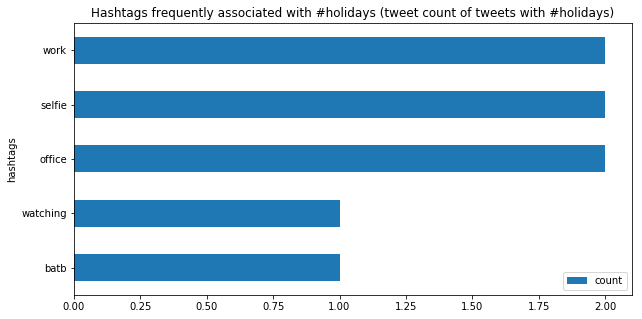

In [84]:
holydays_hashtags=nan_hashtags[ ['holidays' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #holidays: {}'.format(holydays_hashtags.shape[0]))
associated_holydays= ComputeAssociatedHashtags(data, 'holidays')
associated_holydays.iloc[::-1].plot(kind='barh', figsize=(10,5),title='Hashtags frequently associated with #holidays (tweet count of tweets with #holidays)')

### \#holiday (not sure we can use it, not a good feature for unlocal)

number of tweets with #holiday: 3


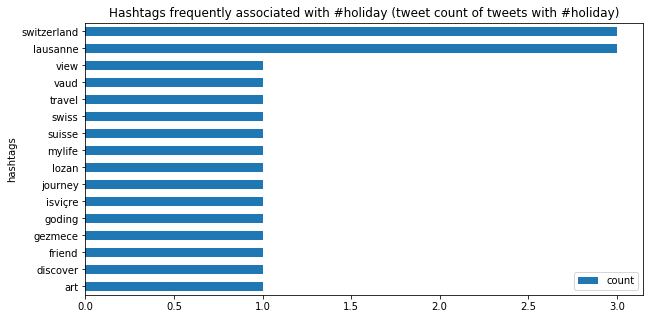

In [96]:
holyday_hashtags=nan_hashtags[ ['holiday' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #holiday: {}'.format(holyday_hashtags.shape[0]))
associated_holyday= ComputeAssociatedHashtags(data, 'holiday')
associated_holyday.iloc[::-1].plot(kind='barh', figsize=(10,5),title='Hashtags frequently associated with #holiday (tweet count of tweets with #holiday)')

### \#travel

number of tweets with #travel: 52


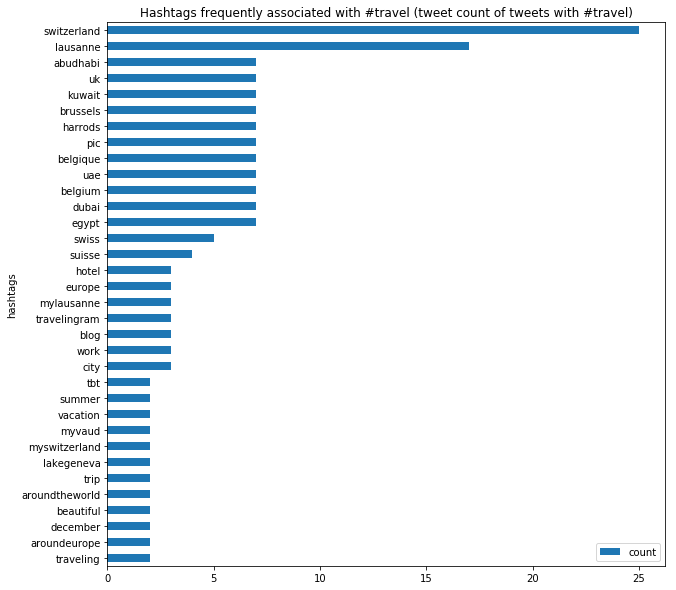

In [86]:
travel_hashtags=nan_hashtags[ ['travel' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #travel: {}'.format(travel_hashtags.shape[0]))
associated_travel= ComputeAssociatedHashtags(data, 'travel')
associated_travel[associated_travel['count'] > 1].iloc[::-1].plot(kind='barh', figsize=(10,10),title='Hashtags frequently associated with #travel (tweet count of tweets with #travel)')

### \#traveling

number of tweets with #traveling: 3


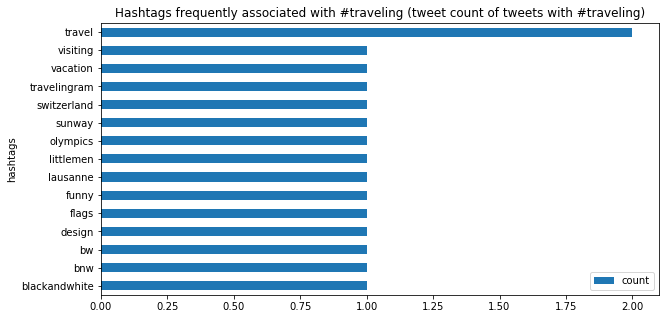

In [88]:
traveling_hashtags=nan_hashtags[ ['traveling' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #traveling: {}'.format(traveling_hashtags.shape[0]))
associated_traveling= ComputeAssociatedHashtags(data, 'traveling')
associated_traveling.iloc[::-1].plot(kind='barh', figsize=(10,5),title='Hashtags frequently associated with #traveling (tweet count of tweets with #traveling)')

### \#travelling

number of tweets with #travelling: 1


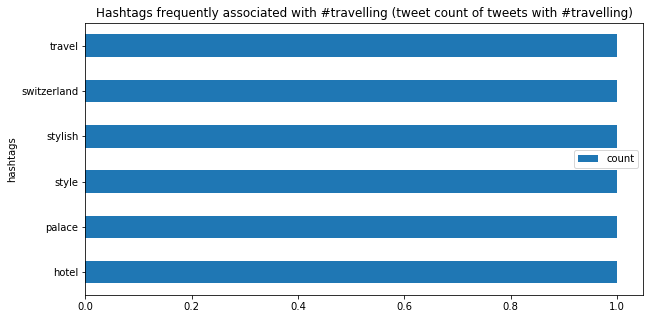

In [90]:
travelling_hashtags=nan_hashtags[ ['travelling' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #travelling: {}'.format(travelling_hashtags.shape[0]))
associated_travelling= ComputeAssociatedHashtags(data, 'travelling')
associated_travelling.iloc[::-1].plot(kind='barh', figsize=(10,5),title='Hashtags frequently associated with #travelling (tweet count of tweets with #travelling)')

### \#trip

number of tweets with #trip: 9


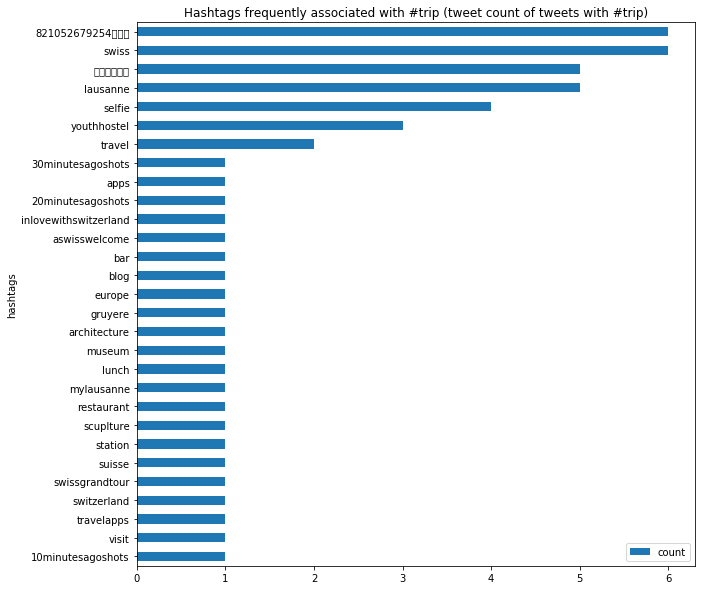

In [91]:
trip_hashtags=nan_hashtags[ ['trip' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #trip: {}'.format(trip_hashtags.shape[0]))
associated_trip= ComputeAssociatedHashtags(data, 'trip')
associated_trip.iloc[::-1].plot(kind='barh', figsize=(10,10),title='Hashtags frequently associated with #trip (tweet count of tweets with #trip)')

### \#hotel

number of tweets with #hotel: 20


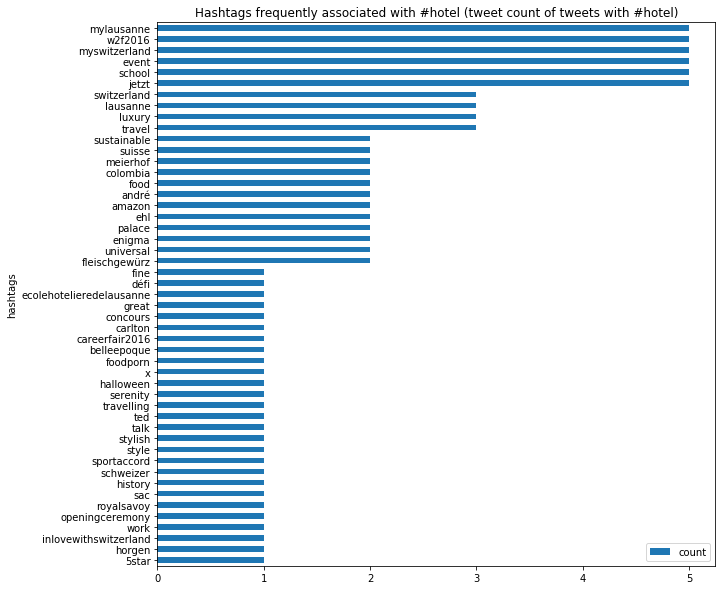

In [92]:
hotel_hashtags=nan_hashtags[ ['hotel' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #hotel: {}'.format(hotel_hashtags.shape[0]))
associated_hotel= ComputeAssociatedHashtags(data, 'hotel')
associated_hotel.iloc[::-1].plot(kind='barh', figsize=(10,10),title='Hashtags frequently associated with #hotel (tweet count of tweets with #hotel)')

### \#airbnb

number of tweets with #airbnb: 1


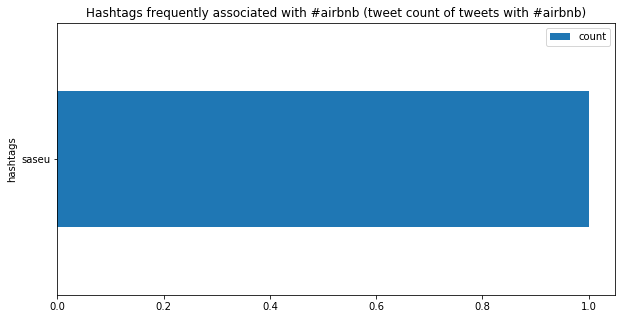

In [97]:
airbnb_hashtags=nan_hashtags[ ['airbnb' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #airbnb: {}'.format(airbnb_hashtags.shape[0]))
associated_airbnb= ComputeAssociatedHashtags(data, 'airbnb')
associated_airbnb.iloc[::-1].plot(kind='barh', figsize=(10,5), title='Hashtags frequently associated with #airbnb (tweet count of tweets with #airbnb)')

In [98]:
voyage_hashtags=nan_hashtags[ ['voyage' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #voyage: {}'.format(voyage_hashtags.shape[0]))
#associated_voyage= ComputeAssociatedHashtags(data, 'voyage')
#associated_voyage.iloc[::-1].plot(kind='barh', figsize=(10,5),title='Hashtags frequently associated with #voyage (tweet count of tweets with #voyage)')

number of tweets with #voyage: 0


### Count of those hashtags in the entire dataset


In [111]:
unlocal_hashtags=['visiting', 'visit', 'tourism', 'hotel', 'trip', 'traveling', 'travel']
unlocal_tweets=nan_hashtags[[intersect(x, unlocal_hashtags)!=[] for x in nan_hashtags['hashtags']]]
print('number of tweets with unlocal hashtags: {}'.format(unlocal_tweets.shape[0]))

number of tweets with unlocal hashtags: 116


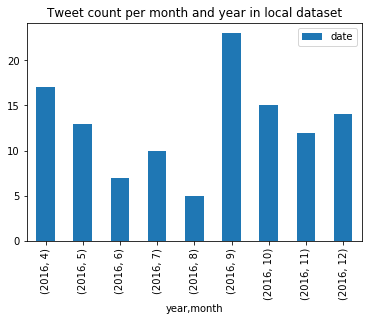

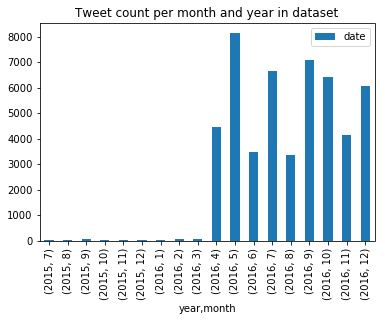

In [122]:
unlocal_up_time= pd.DataFrame(columns=['year', 'month','date'])
unlocal_up_time['date']=unlocal_tweets['created_at']

unlocal_up_months = pd.to_datetime(unlocal_tweets['created_at'],format='%y-%M-%d %H:%M %p').apply(lambda x: x.month)
unlocal_up_time['month']=unlocal_up_months

unlocal_up_year = pd.to_datetime(unlocal_tweets['created_at'],format='%y-%M-%d %H:%M %p').apply(lambda x: x.year)
unlocal_up_time['year']=unlocal_up_year

unlocal_up_time.groupby(['year','month']).count().plot(kind='bar',title='Tweet count per month and year in local dataset')
up_time.groupby(['year','month']).count().plot(kind='bar',title='Tweet count per month and year in dataset')

## Features for local: Tweets with user location set in Lausanne

In [99]:
print('number of tweets in dataset: {}'.format(data.shape[0]))
local_data = data[[('Lausanne' in x)  if x != None else False for x in data['user_location'] ]]
print('number of tweets from users who set their location to Lausanne: {}'.format(local_data.shape[0]))

Number of tweets in dataset: 50000
Number of tweets from users who set their location to Lausanne: 17811


In [102]:
local_user=local_data['user_id'].map(lambda x: x['$numberLong'] if isinstance(x,dict) else x)
print('number of users in the dataset: {}'.format(data['user_id'].unique().shape[0]))
print('number of users with their location set to Lausanne: {}'.format(local_user.unique().shape[0]))

number of users in the dataset: 4462
Number of users with their location set to Lausanne: 645


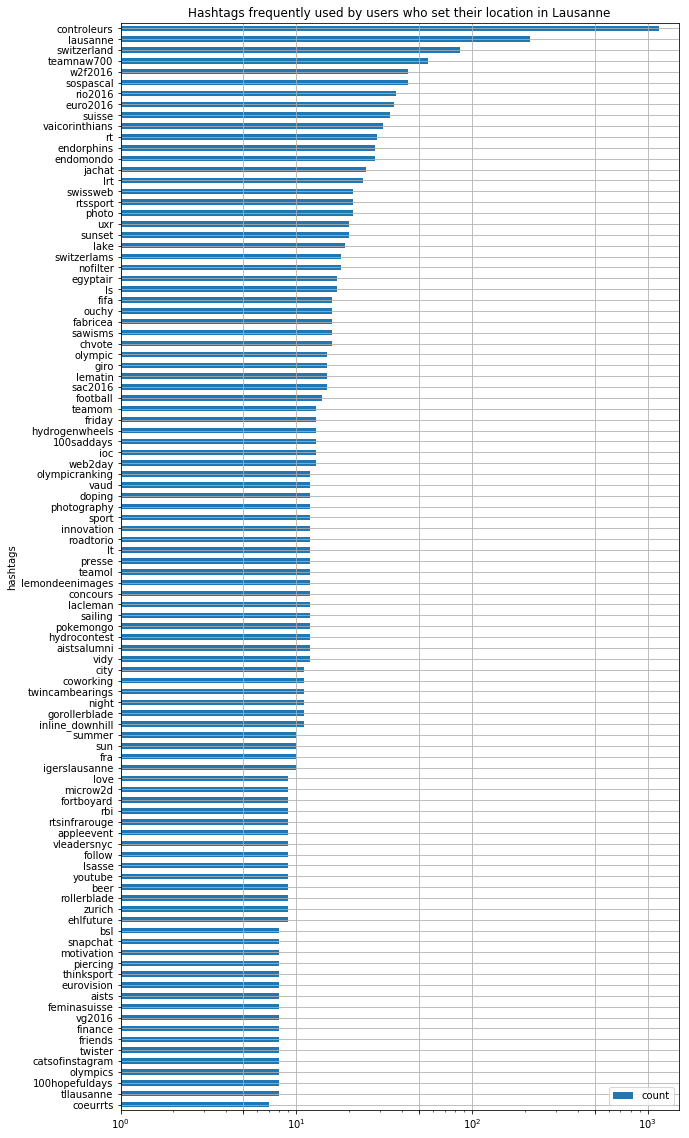

In [65]:
local_hashtags= ComputeFrequentdHashtags(data=local_data)
local_hashtags.iloc[::-1].plot(kind='barh', figsize=(10,20),logx=True, grid=True, xticks=[1,5,10,50,100,500,1000] ,title='Hashtags frequently used by users who set their location in Lausanne')

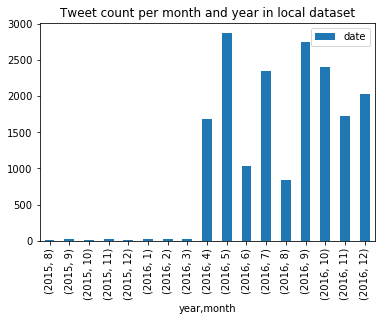

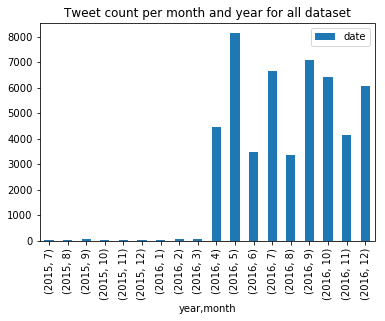

In [121]:
local_up_time= pd.DataFrame(columns=['year', 'month','date'])
local_up_time['date']=local_data['created_at']

local_up_months = pd.to_datetime(local_data['created_at'],format='%y-%M-%d %H:%M %p').apply(lambda x: x.month)
local_up_time['month']=local_up_months

local_up_year = pd.to_datetime(local_data['created_at'],format='%y-%M-%d %H:%M %p').apply(lambda x: x.year)
local_up_time['year']=local_up_year

local_up_time.groupby(['year','month']).count().plot(kind='bar',title='Tweet count per month and year in local dataset')
up_time.groupby(['year','month']).count().plot(kind='bar',title='Tweet count per month and year for all dataset')

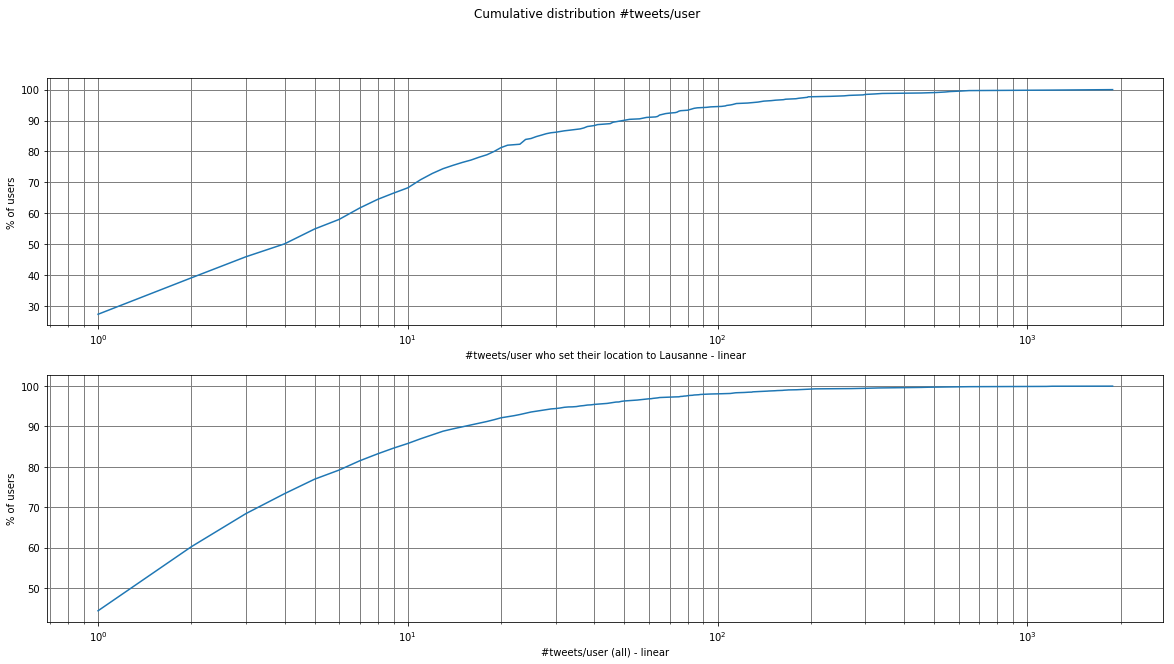

In [120]:
local_tweet_freq= local_data.groupby(by='user_id').count()
local_tweet_freq=local_tweet_freq['_id']
local_tweet_freq=local_tweet_freq.reset_index().rename(columns={'_id': 'tweet count'})


f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10))
f.suptitle('Cumulative distribution #tweets/user')

ax1.plot(pd.DataFrame(local_tweet_freq.sort_values(by='tweet count')).groupby('tweet count').count().cumsum()*100/local_tweet_freq.shape[0])
ax1.set_xlabel('#tweets/user who set their location to Lausanne - linear')
ax1.set_ylabel('% of users')
ax1.set_xscale('log')
ax1.grid(color='grey', linestyle='-', linewidth=1, axis='both', which='both')

ax2.plot(pd.DataFrame(tweet_freq.sort_values(by='tweet count')).groupby('tweet count').count().cumsum()*100/tweet_freq.shape[0])
ax2.set_xlabel('#tweets/user (all) - linear')
ax2.set_ylabel('% of users')
ax2.set_xscale('log')
ax2.grid(color='grey', linestyle='-', linewidth=1, axis='both', which='both')

# Coordinates 

why is there some data without coordinates when it's tweet geolocalized in Lausanne ?

In [123]:
unlocalized_data= data[data['coordinates'].isnull()]
print('Number of total tweets {}'.format(data.shape[0]))
print('Number of unlocalized tweets {}'.format(unlocalized_data.shape[0]))
print('Number of localized tweets {}'.format(data.shape[0] - unlocalized_data.shape[0]))

Number of total tweets 50000
Number of unlocalized tweets 43375
Number of localized tweets 6625


In [34]:
import folium

#create and display map (centered on Lausanne) of tweets
#df : tweets dataset, with
#popup_col: column values to show on popup, color_hx: hexadecimal color code for the tweet markers
#function already filter tweets to plot those with coordinates
def tweetMap(df,popup_col,color_hx):
    localized_data= df[~df['coordinates'].isnull()]
    localized_data['coordinates']= localized_data['coordinates'].map(lambda x: x['coordinates'])
    map_lausanne = folium.Map(location=[46.533340, 6.623380], zoom_start=12)
    localized_data.apply(lambda x: folium.CircleMarker([x['coordinates'][1],x['coordinates'][0]],radius=5,color=color_hx, fill_color=color_hx, fill=True, fill_opacity=0.7, popup=folium.Popup(x[popup_col], parse_html=True)).add_to(map_lausanne), axis =1 )
    return map_lausanne
    
map_lausanne = tweetMap(data[1:2000], 'text','#ff0000')
map_lausanne

/Users/valentine/anaconda/envs/ada/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## Hashtags associated with \#lausanne
Filter by #lausanne  and Compute the hashtags associated with \#lausanne

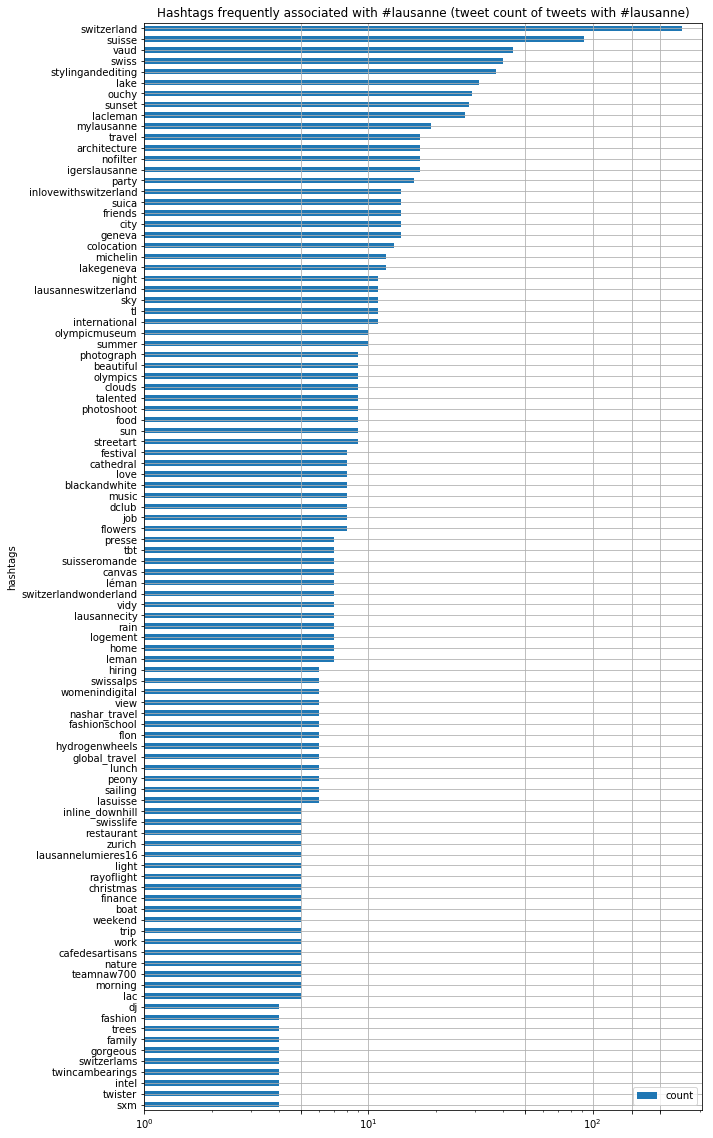

In [44]:
#Return 100 hashtags most associated with main_hashtags in the dataset df  with the count of  each hashtags
# also
def ComputeAssociatedHashtags(data, main_hashtag):  
    #exclude tweet without hashtags
    nan_hashtags=data[~data['hashtags'].isnull()]
    #keep tweets with hashtag lausanne
    lausanne_hashtags=nan_hashtags[ [main_hashtag in x for x in list(nan_hashtags['hashtags'])] ]
    associated_hashtags= list(lausanne_hashtags['hashtags'])
    associated_hashtags= reduce(operator.add, associated_hashtags)
    associated_hashtags= [x for x in associated_hashtags if x!= main_hashtag]
    associated_hashtags= pd.concat([pd.DataFrame(associated_hashtags)])
    associated_hashtags['count']= pd.DataFrame(list(np.ones(len(associated_hashtags))))
    associated_hashtags = associated_hashtags.rename(columns={0:'hashtags'})
    associated_hashtags = associated_hashtags.groupby(by='hashtags').count().sort_values(by= 'count', ascending= True).tail(100)
    

    return associated_hashtags.iloc[::-1]

associated_lausanne= ComputeAssociatedHashtags(data, 'lausanne')
associated_lausanne.iloc[::-1].plot(kind='barh', figsize=(10,20),logx=True, grid=True, xticks=[1,5,10,50,100,150,200], title='Hashtags frequently associated with #lausanne (tweet count of tweets with #lausanne)')

# Retweet

In [ ]:
data[data['retweet_count']==0]
#print(data['retweet_count'])

In [ ]:
data[]

In [ ]:
local_data['user_id'].unique()

# Number of image

In [ ]:
entities= data['entities']

In [ ]:

def has_media(x):
    try :
        x['media']
        return True
    except:
        return False
    
media= [x['media'] for x in entities  if has_media(x)==True]

In [ ]:
len(media)

In [ ]:
media[0][0]['type']

In [ ]:
media

In [ ]:
def has_photo(x):
    try :
        return x[0]['type']=='video'
    except:
        return False

media_photo=[x for x in media if has_photo(x)== True]
len(media_photo)

#  Retweet count Evgeniy

In [ ]:
data_bis= pd.read_json('../data/lausanne_50K_evgeniy.json',typ='frame',lines=True)

In [ ]:
data_bis[data_bis['retweet_count']!=0]